In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
titanic = pd.read_csv("/Users/thomassimmons/c/d/datasets/titanic.csv")

In [91]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [92]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [93]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
titanic.columns = titanic.columns.str.strip().str.lower().str.replace(" ", "_")

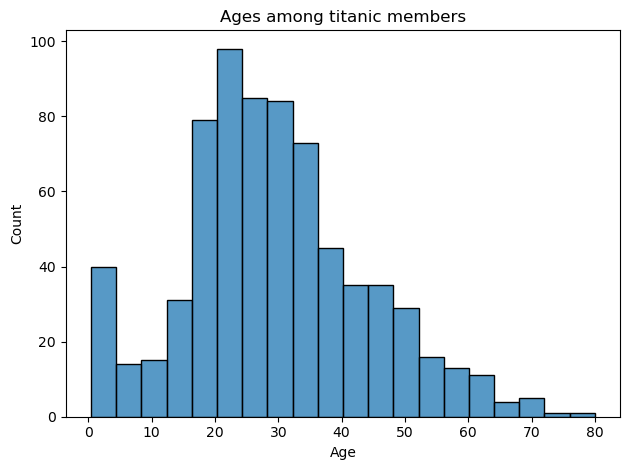

In [95]:
sns.histplot(titanic['age'])
plt.title("Ages among titanic members")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

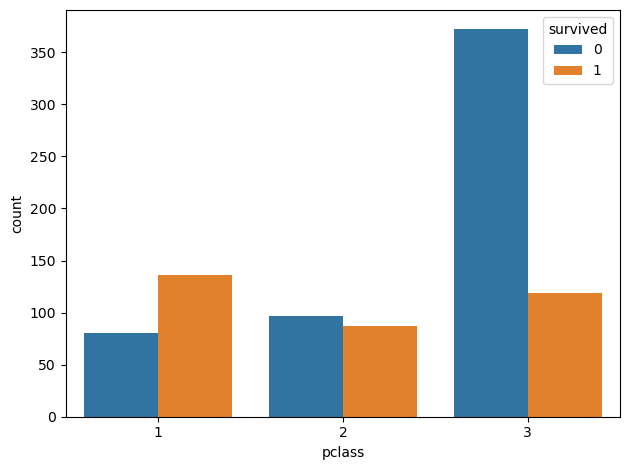

In [96]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.tight_layout()

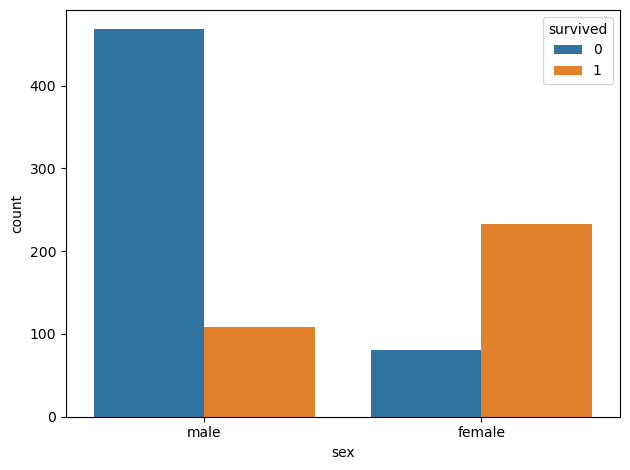

In [97]:
sns.countplot(data=titanic, x='sex', hue='survived')
plt.tight_layout()

In [98]:
titanic['cabin'] = titanic['cabin'].fillna(titanic['cabin'].mode(), inplace=True)

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_29764/1449071161.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['cabin'] = titanic['cabin'].fillna(titanic['cabin'].mode(), inplace=True)


In [99]:
titanic.drop(['cabin','name'],axis=1, inplace=True)

In [100]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [101]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [102]:
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})

In [103]:
titanic['embarked'].head(5)

0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object

In [104]:
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

In [108]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked_q', 'embarked_s'],
      dtype='object')

In [109]:
titanic.columns = titanic.columns.str.lower()

In [114]:
titanic['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [115]:
titanic['age'].fillna(titanic['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [117]:
titanic['age'] = titanic['age'].astype('int64')

In [118]:
titanic['age'].dtype

dtype('int64')

In [120]:
titanic['embarked_q'] = titanic['embarked_q'].astype('int64')
titanic['embarked_s'] = titanic['embarked_s'].astype('int64')

In [122]:
titanic['pclass'] = titanic['pclass'].astype('int64')

In [123]:
titanic['pclass'].dtype

dtype('int64')

In [126]:
df = pd.read_csv("/Users/thomassimmons/Downloads/synthetic_student_survey.csv")

In [129]:
# Housing and summary satisfaction
housing_summary = df.groupby("year").agg(
    avg_housing = ("housing_satisfaction", "mean"),
    avg_sustainability = ("sustainability_importance", "mean")
).reset_index()

In [130]:
print(housing_summary)

        year  avg_housing  avg_sustainability
0   Freshman     3.097328            3.036260
1   Graduate     3.031746            2.958333
2     Junior     2.913223            2.948347
3     Senior     3.076471            2.964706
4  Sophomore     2.972803            2.949791


<Axes: xlabel='sustainability_importance', ylabel='Count'>

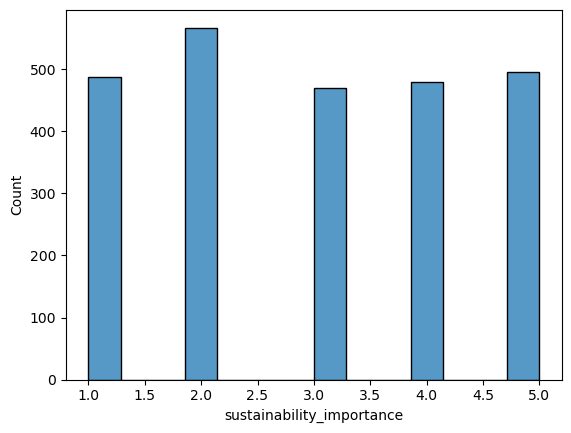

In [131]:
sns.histplot(df['sustainability_importance'])

<Axes: xlabel='housing_satisfaction', ylabel='Count'>

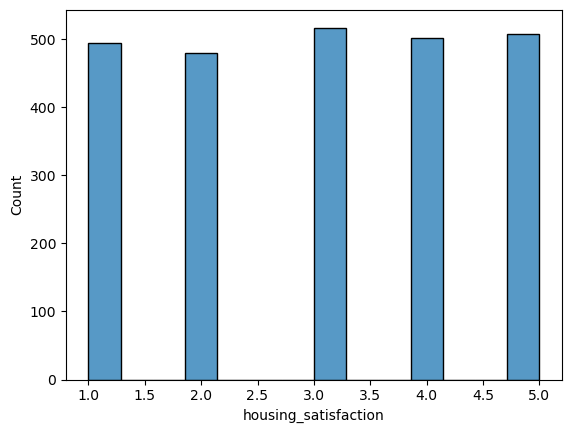

In [132]:
sns.histplot(df['housing_satisfaction'])

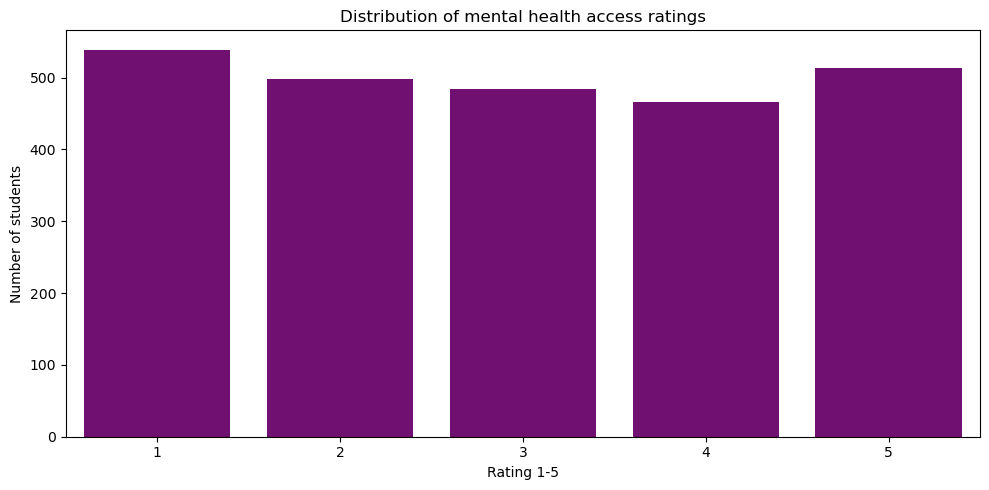

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='mental_health_access', color='purple')
plt.title("Distribution of mental health access ratings")
plt.xlabel("Rating 1-5")
plt.ylabel("Number of students")
plt.tight_layout()
plt.show()